In [1]:
# to import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style("whitegrid")

In [7]:
# to import dataset
df = pd.read_csv("C:/Users/miche/Desktop/machine_learning/HDB_resale_price.csv")

In [9]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [11]:
# to check data types of variables
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                194170 non-null  object 
 1   town                 194170 non-null  object 
 2   flat_type            194170 non-null  object 
 3   block                194170 non-null  object 
 4   street_name          194170 non-null  object 
 5   storey_range         194170 non-null  object 
 6   floor_area_sqm       194170 non-null  float64
 7   flat_model           194170 non-null  object 
 8   lease_commence_date  194170 non-null  int64  
 9   remaining_lease      194170 non-null  object 
 10  resale_price         194170 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.3+ MB


(194170, 11)

In [13]:
# to check for any duplicated data
duplicates = df[df.duplicated()]

In [15]:
# there are 278 rows of duplicated data
duplicates

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
510,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0
591,2017-01,JURONG WEST,4 ROOM,337A,TAH CHING RD,19 TO 21,92.0,Model A,2010,92 years 03 months,470000.0
672,2017-01,PASIR RIS,4 ROOM,753,PASIR RIS ST 71,01 TO 03,105.0,Model A,1996,78 years 10 months,368000.0
...,...,...,...,...,...,...,...,...,...,...,...
187510,2024-08,PUNGGOL,4 ROOM,220B,SUMANG LANE,07 TO 09,93.0,Model A,2018,93 years 05 months,645000.0
187726,2024-08,SEMBAWANG,4 ROOM,508C,WELLINGTON CIRCLE,07 TO 09,85.0,Model A,2004,79 years 01 month,520000.0
190108,2024-09,SENGKANG,3 ROOM,471C,FERNVALE ST,01 TO 03,68.0,Model A,2016,91 years 01 month,475000.0
192283,2024-10,SENGKANG,4 ROOM,329B,ANCHORVALE ST,10 TO 12,93.0,Model A,2015,89 years 11 months,695000.0


In [17]:
# to remove all duplicated values
df.drop_duplicates(inplace=True)

C:\Users\miche\AppData\Local\Temp\ipykernel_2124\2562620113.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=df, x='flat_type', palette='hls')


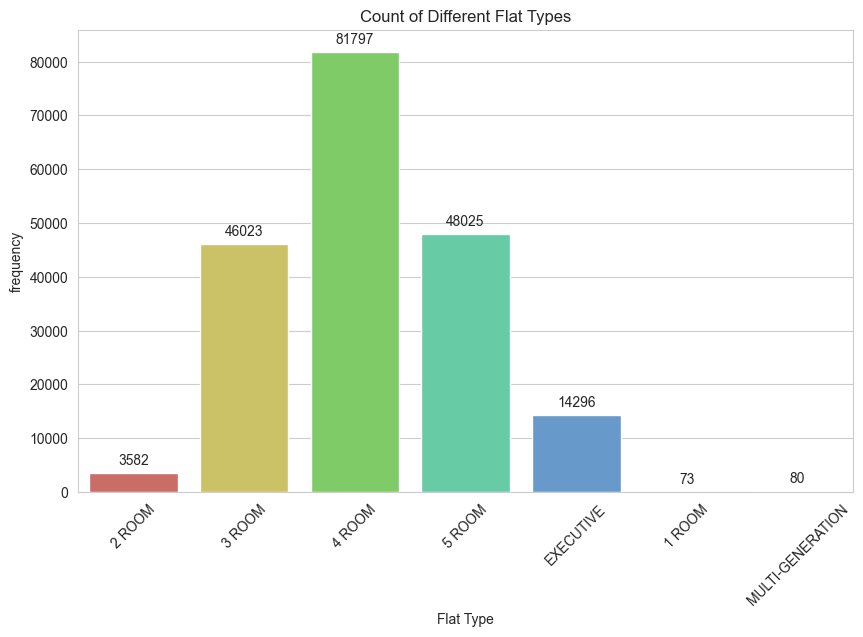

In [19]:
# Exploratory data analysis

# Bar chart for flat type with annotations
plt.figure(figsize=(10,6))
count_plot = sns.countplot(data=df, x='flat_type', palette='hls')
plt.title("Count of Different Flat Types")
plt.xlabel('Flat Type')
plt.ylabel('frequency')
plt.xticks(rotation=45)

# Annotate the bars with the frequency count
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() /2., p.get_height()),
                        ha = 'center', va= 'center',
                        xytext = (0, 9),
                        textcoords = 'offset points')
plt.show()

In [23]:
df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

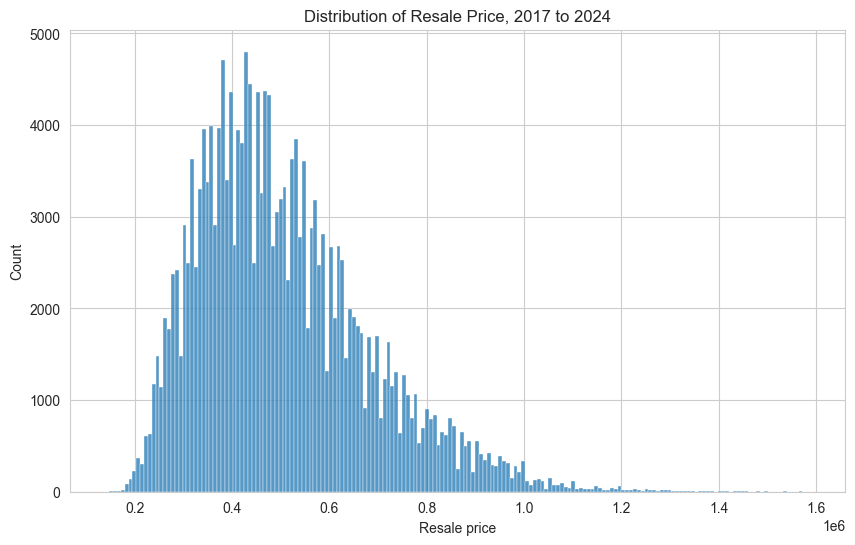

In [11]:
# to plot a histogram of resale price
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='resale_price')
plt.title('Distribution of Resale Price, 2017 to 2024')
plt.xlabel('Resale price')
plt.show()

In [29]:
# Feature Engineering
df['month'] = pd.to_datetime(df['month'])

In [31]:
df['year'] = df['month'].dt.year
df['Month'] = df['month'].dt.month

In [33]:
# to remove unwanted column after feature engineering
df = df.drop('month', axis=1)

In [35]:
df['remaining_lease'].value_counts()

remaining_lease
94 years 10 months    1706
94 years 09 months    1700
94 years 11 months    1677
94 years 08 months    1556
94 years 07 months    1465
                      ... 
97 years 01 month        1
93 years 0 months        1
95 years 0 months        1
66 years 0 months        1
97 years 07 months       1
Name: count, Length: 680, dtype: int64

In [37]:
# to convert 'remaining_lease' into 'int' or 'float' variable
df['Remaining_lease_float'] = (pd.to_numeric(df['remaining_lease'].str.extractall('(\d+)')[0])
                 .unstack().div([1, 12]).sum(axis=1)
                 .round(2))

In [39]:
# to remove unwanted column after feature engineering is done, no longer useful
df = df.drop('remaining_lease', axis=1)

In [41]:
df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,Month,Remaining_lease_float
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,2017,1,61.33
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,2017,1,60.58
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,2017,1,62.42
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,2017,1,62.08
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,2017,1,62.42


C:\Users\miche\AppData\Local\Temp\ipykernel_2124\3796196051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='resale_price', palette='Paired')


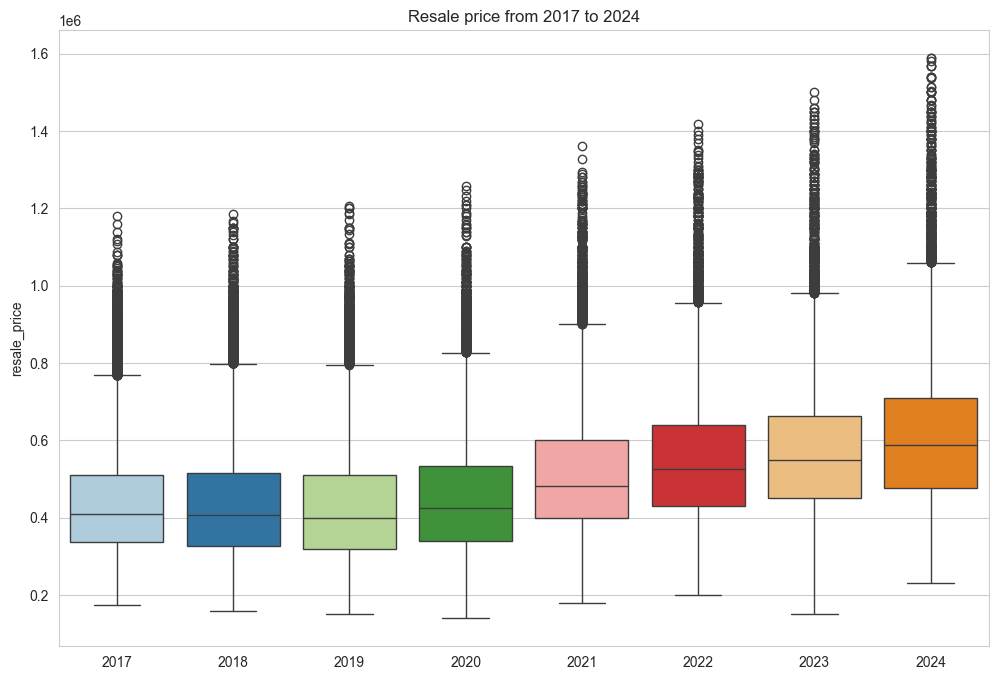

In [49]:
# to see the trend of HDB resale price increase over the years
plt.figure(figsize=(12,8), dpi=100)
sns.boxplot(data=df, x='year', y='resale_price', palette='Paired')
plt.title('Resale price from 2017 to 2024')
plt.xlabel('')
plt.show()

In [55]:
pd.DataFrame(df.groupby('year')['resale_price'].median())

,resale_price
year,
2017,410000.0
2018,408000.0
2019,400000.0
2020,425000.0
2021,483000.0
2022,525000.0
2023,550000.0
2024,588000.0


In [58]:
# Function to convert storey_range to ordinal scale by taking the average of the range
def convert_storey_range(storey_range: str) -> float:
    """
    Converts a storey range string into its average numerical value.
    
    The function takes a storey range in the format 'XX TO YY', splits it into two parts,
    converts these parts to integers, and returns the average of these integers.
    
    Args:
        storey_range (str): A string representing a range of storeys, in the format 'XX TO YY'.
        
    Returns:
        float: The average value of the two storeys in the range.
        
    Example:
        convert_storey_range('07 TO 09') -> 8.0
    """
    range_values = storey_range.split(' TO ')
    return (int(range_values[0]) + int(range_values[1])) / 2

# Use the .apply() method to convert the 'storey_range' column with the function
df['storey_range'] = df['storey_range'].apply(convert_storey_range)

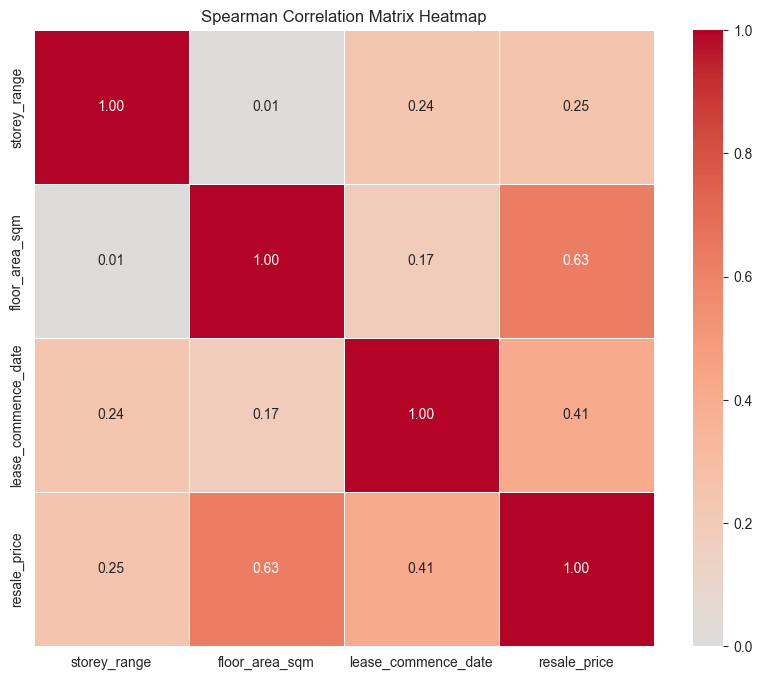

In [60]:
# Select relevant columns for correlation analysis
spearman_vars = df[['storey_range', 'floor_area_sqm', 'lease_commence_date', 'resale_price']]

# Compute the Spearman correlation matrix
spearman_corr = spearman_vars.corr(method='spearman')

# correlation heatmap shows that the Resale Price of the HDB is highly correlated with the Floor area (sqm)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0, vmin=0, vmax=1, linewidths=0.5, fmt=".2f")
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

In [62]:
df2 = df[df['year']==2024]

In [64]:
df2.shape

(25006, 12)

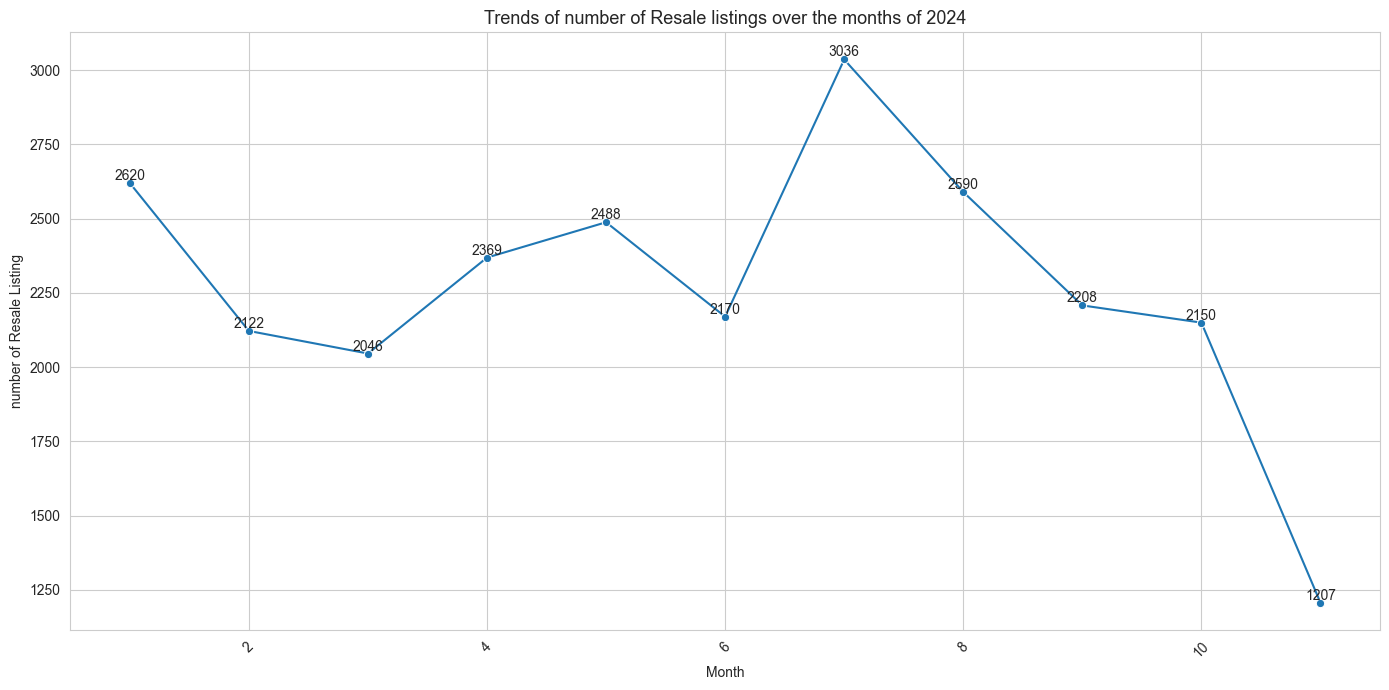

In [68]:
# to view the number of listings per month in year 2024
month_counts = df2['Month'].value_counts().sort_index()

# to create a line chart
plt.figure(figsize=(14, 7))
line_plot = sns.lineplot(x= month_counts.index, y=month_counts.values, marker='o')

# Annotate the Data points
for x, y in zip(month_counts.index, month_counts.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

# Jult has the highest listing followed by Jan 2024
# label the chart
plt.title('Trends of number of Resale listings over the months of 2024', fontsize=13)
plt.xlabel('Month')
plt.ylabel('number of Resale Listing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\miche\AppData\Local\Temp\ipykernel_2124\3371872373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, y='resale_price', x='flat_type', palette='Paired')


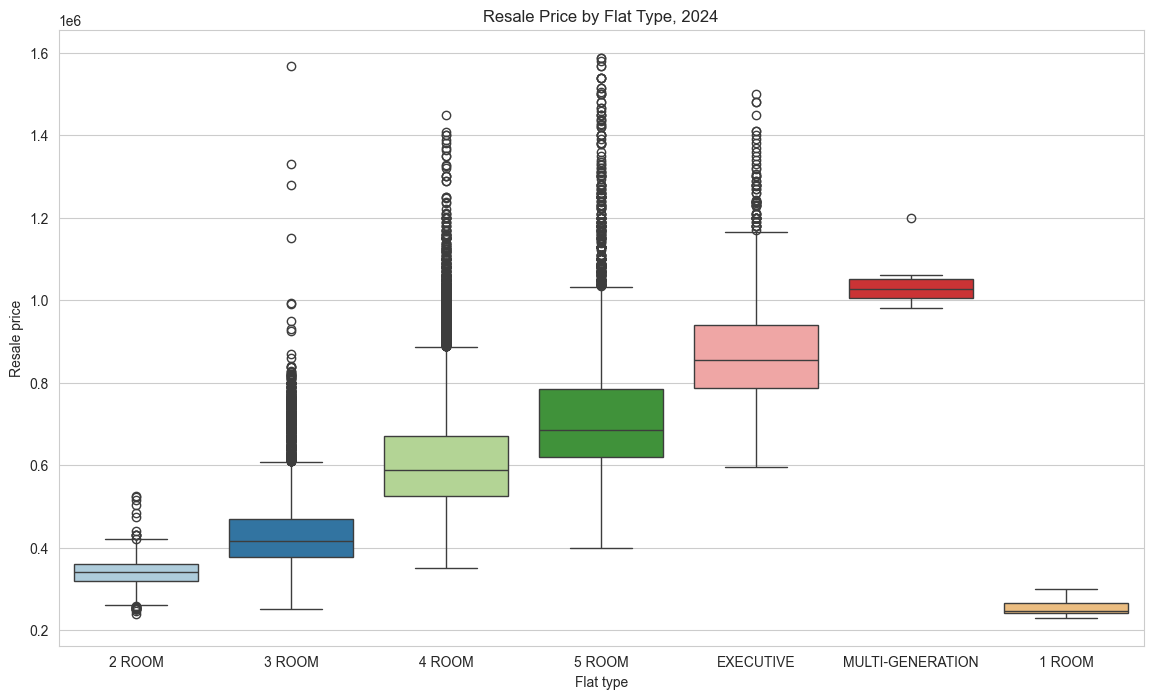

In [70]:
# Resale Price by Flat Type in 2024
plt.figure(figsize=(14,8))
sns.boxplot(data=df2, y='resale_price', x='flat_type', palette='Paired')
plt.title('Resale Price by Flat Type, 2024')
plt.xlabel('Flat type')
plt.ylabel('Resale price')
plt.show()

C:\Users\miche\AppData\Local\Temp\ipykernel_2124\2202682959.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=df2, y='town', order=sorted_town_id, palette='Spectral')


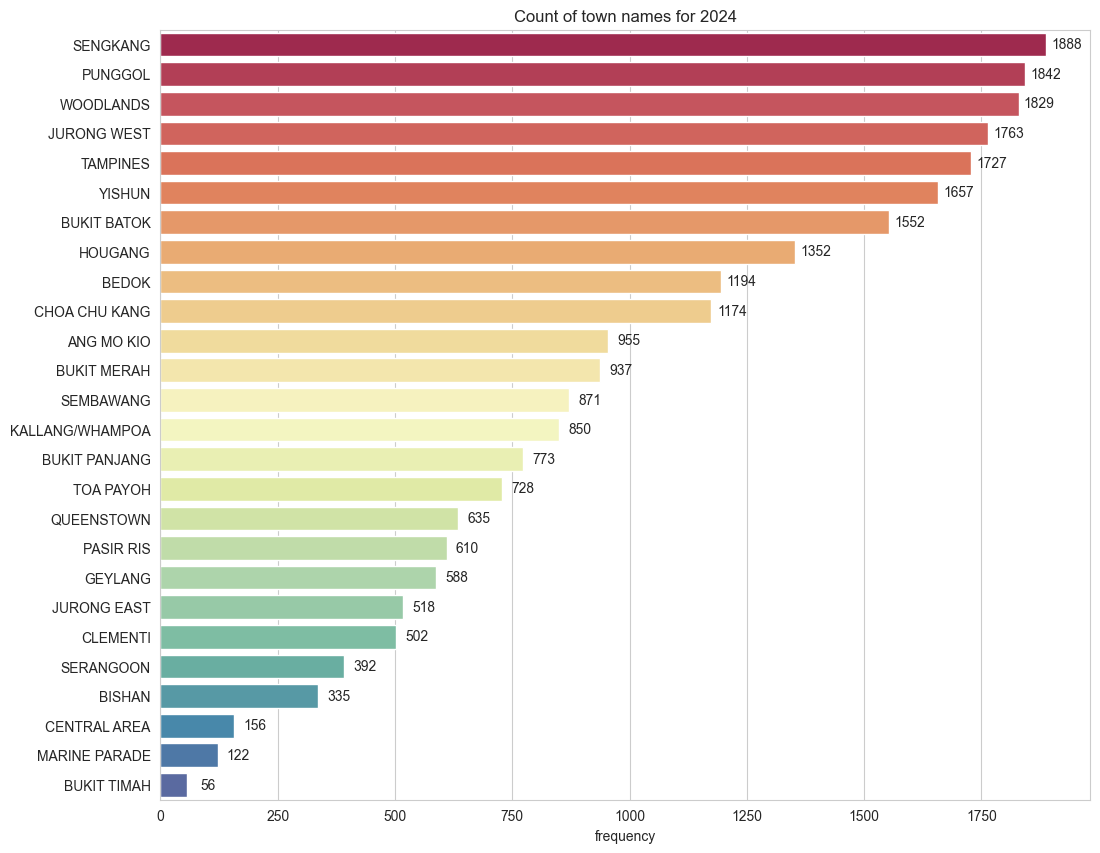

In [72]:
# Punggol saw the most HDB flats listed out in 2023, followed by Woodlands and SengKang

# Sort the town name by count of listings published
sorted_town_id = df2['town'].value_counts().index

# count plot for town_id with annotations
plt.figure(figsize=(12,10))
count_plot = sns.countplot(data=df2, y='town', order=sorted_town_id, palette='Spectral')
plt.title('Count of town names for 2024')
plt.xlabel('frequency')
plt.ylabel('')

# to annotate the bars with the frequency count
for p in count_plot.patches:
    count_plot.annotate(format(p.get_width(), '.0f'),
                          (p.get_width(), p.get_y() + p.get_height() / 2),
                          ha='center', va='center',
                          xytext=(15, 0),
                          textcoords='offset points')
plt.show()

In [76]:
# the Floor area in square meters is highly correlate with Resale price, followed by Lease commence date
df2.select_dtypes(['int','float']).corr()['resale_price'].sort_values(ascending=False)

resale_price             1.000000
floor_area_sqm           0.679311
lease_commence_date      0.364714
Remaining_lease_float    0.363904
storey_range             0.353280
Month                    0.080394
year                          NaN
Name: resale_price, dtype: float64

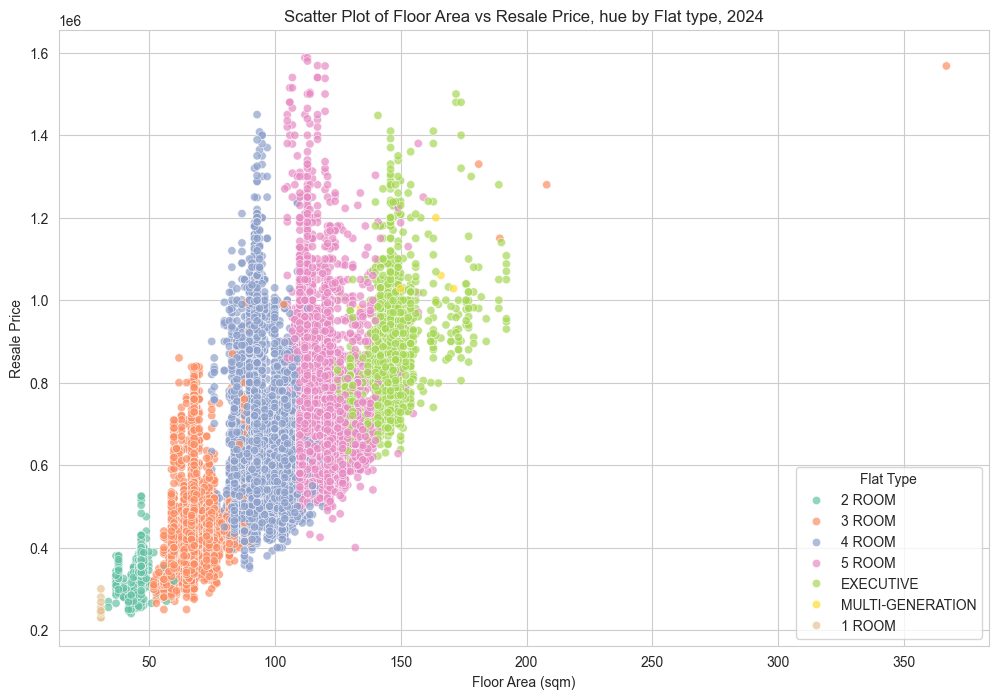

In [78]:
# Mult-Generation Flats are the most expensive, the larger the floor area, the more expensive the HDB
# to plot Floor Area vs Resale price, hue by Flat type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df2, x='floor_area_sqm', y='resale_price', hue='flat_type', palette='Set2', alpha=0.7)
plt.title('Scatter Plot of Floor Area vs Resale Price, hue by Flat type, 2024')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.legend(title='Flat Type', loc='lower right')
plt.show()

C:\Users\miche\AppData\Local\Temp\ipykernel_2124\2441718138.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df2, y='town', x='resale_price', palette='Paired', ci=None)
C:\Users\miche\AppData\Local\Temp\ipykernel_2124\2441718138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, y='town', x='resale_price', palette='Paired', ci=None)


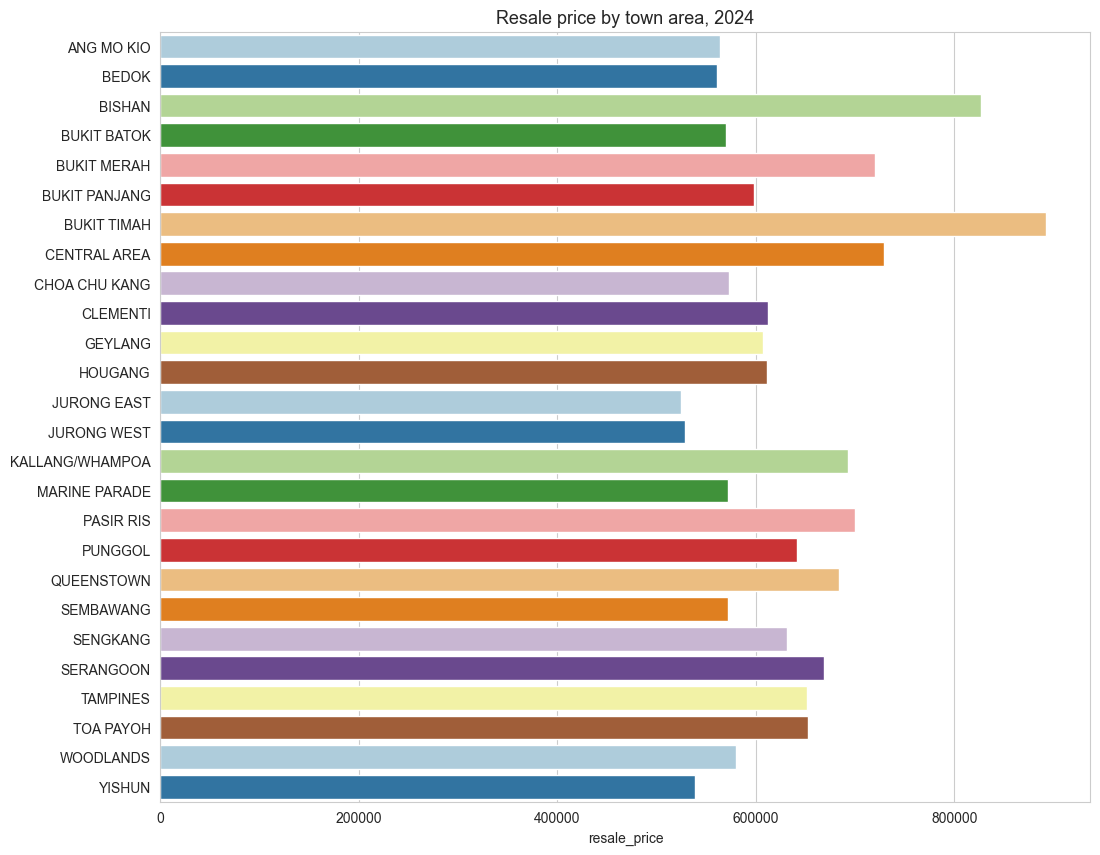

In [80]:
# HDB flats around Bt.Timah is the most expensive, followed by Bishan

# to plot Resale Price by Town name
plt.figure(figsize=(12,10), dpi=100)
sns.barplot(data=df2, y='town', x='resale_price', palette='Paired', ci=None)
plt.title('Resale price by town area, 2024', fontsize=13)
plt.ylabel('')
plt.show()

In [82]:
# Resale price by Town name in 2024
pd.DataFrame(df2.groupby('town')['resale_price'].median().sort_values(ascending=False))

,resale_price
town,
BUKIT TIMAH,899000.0
BISHAN,800888.0
BUKIT MERAH,756888.0
KALLANG/WHAMPOA,688888.0
PASIR RIS,685000.0
QUEENSTOWN,675000.0
TAMPINES,640000.0
PUNGGOL,639944.0
SERANGOON,629000.0


In [84]:
# to print the median resale price of the HDB flats in 2024
pd.DataFrame(df2.groupby('flat_model')['resale_price'].median().sort_values(ascending=False))

,resale_price
flat_model,
Type S2,1450000.0
Type S1,1325000.0
Premium Apartment Loft,1225940.0
Multi Generation,1028000.0
Terrace,950000.0
Improved-Maisonette,913888.0
Model A-Maisonette,908000.0
Maisonette,898999.5
Adjoined flat,875000.0


In [86]:
df3 = df[df['town']=='JURONG EAST']

In [88]:
pd.DataFrame(df3.groupby('flat_type')['resale_price'].median().sort_values(ascending=False))

,resale_price
flat_type,
EXECUTIVE,745000.0
5 ROOM,580000.0
4 ROOM,445000.0
3 ROOM,325000.0
2 ROOM,258000.0


In [90]:
df4 =df[df['town']=='WOODLANDS']

In [92]:
pd.DataFrame(df4.groupby('flat_type')['resale_price'].median().sort_values(ascending=False))

,resale_price
flat_type,
EXECUTIVE,690000.0
5 ROOM,480000.0
4 ROOM,405000.0
3 ROOM,313000.0
2 ROOM,308000.0


In [94]:
df5 = df[df['town']=='BUKIT BATOK']

In [96]:
pd.DataFrame(df5.groupby('flat_type')['resale_price'].median().sort_values(ascending=False))

,resale_price
flat_type,
EXECUTIVE,680000.0
5 ROOM,640000.0
4 ROOM,465000.0
2 ROOM,345000.0
3 ROOM,310000.0


In [98]:
# to remove unimportant variables before machine learning classification algorithm
df = df.drop(['street_name','storey_range','block','year','Month'], axis=1)

In [100]:
df.head()

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Remaining_lease_float
0,ANG MO KIO,2 ROOM,44.0,Improved,1979,232000.0,61.33
1,ANG MO KIO,3 ROOM,67.0,New Generation,1978,250000.0,60.58
2,ANG MO KIO,3 ROOM,67.0,New Generation,1980,262000.0,62.42
3,ANG MO KIO,3 ROOM,68.0,New Generation,1980,265000.0,62.08
4,ANG MO KIO,3 ROOM,67.0,New Generation,1980,265000.0,62.42


In [102]:
# to define X and y
X = df.drop('resale_price', axis=1)

In [104]:
X = pd.get_dummies(X, drop_first=True)

In [106]:
y = df['resale_price']

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [110]:
# testing data= 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [112]:
# to scale the X train and test set
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [114]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

In [116]:
# to perform cross-validation to determine which alpha value to use in Ridge regression
from sklearn.linear_model import RidgeCV

In [118]:
# perform cross validation to determine which alpha value to use in Ridge regression
# alpha = 0.1, 1.0, 10.0 are default values in Ridge CV model
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0))

In [120]:
# to use the training set for the purpose of Hyper parameter tuning for Ridge regression model
ridge_cv_model.fit(scaled_X_train, y_train)

RidgeCV()

In [122]:
# to see which alpha value perform the best, alpha= 1.0 performs the best
ridge_cv_model.alpha_

0.1

In [124]:
# neg_mean_absolute_error, the higher the value the better, to re-run model with the scoring metric
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

In [126]:
ridge_cv_model.fit(scaled_X_train, y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [128]:
# to see which alpha value perform the best after using the scoring metric, alpha= 10 performs the best
ridge_cv_model.alpha_

10.0

In [130]:
ridge_cv_model.coef_[:10]

array([  95762.28158475,  440143.0535947 , -357112.73496747,
         -4528.47712314,   12284.25457115,  -18572.57061947,
         22426.17511211,  -25631.71943949,    9802.0551268 ,
         10674.62060546])

In [132]:
# to import LASSO CV for hyperparameter tuning to prevent overfitting
from sklearn.linear_model import LassoCV

In [134]:
# default values: eps= 0.01, n_alphas=100, to increase no. of max iterations
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)

In [136]:
# to fit Lasso CV onto the training data
lasso_cv_model.fit(scaled_X_train, y_train)

LassoCV(cv=5, max_iter=1000000)

In [138]:
# to find the best performing alpha value in Lasso Regression
lasso_cv_model.alpha_

104.39560204737573

In [140]:
# to print first 10 coefficients in the Lasso regression model
lasso_cv_model.coef_[:10]

array([  98832.73829535,  433787.11203894, -350425.30747192,
         -3463.95915713,   12761.24567455,  -17563.40676749,
         23025.85850874,  -24630.00736358,    9909.24918029,
         11032.01418871])

In [142]:
# ElasticNet is a combination of L1 (Ridge) and L2 (LASSO) regularization
from sklearn.linear_model import ElasticNetCV

In [144]:
# Default values, eps=0.001, n_alphas= 100
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
                               eps=0.001, n_alphas=100, max_iter=1000000)

In [146]:
# to train ElasticNet on training Data
elastic_cv_model.fit(scaled_X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [62]:
elastic_cv_model.l1_ratio_

1.0

In [147]:
# Elastic Net alpha = 104.395 (same as the alpha regression), the model completely disregards Ridge regression
elastic_cv_model.alpha_

104.39560204737573

In [150]:
# Decision Tree regression
dt = DecisionTreeRegressor()

In [152]:
# to fit decision tree regressor into the training data
dt.fit(scaled_X_train, y_train)

DecisionTreeRegressor()

In [154]:
# no overfitting/ underfitting on both training and test set
print(f"Decision tree_training set score: {dt.score(scaled_X_train, y_train):.3f}")
print(f"Decision tree_testing set score: {dt.score(scaled_X_test, y_test):.3F}") 

Decision tree_training set score: 0.988
Decision tree_testing set score: 0.917


In [156]:
# using ElasticNet to predict on the X testing data
dt_test_pred = dt.predict(scaled_X_test)
dt_test_pred

array([537000.        , 415000.        , 685333.33333333, ...,
       350000.        , 818888.        , 385000.        ])

In [158]:
# to calculate Regression metrics for testing set, Decision Tre
dt_mae_test = mean_absolute_error(y_test, dt_test_pred)
dt_mse_test = mean_squared_error(y_test, dt_test_pred)
dt_rmse_test = root_mean_squared_error(y_test, dt_test_pred)
dt_r2_test = r2_score(y_test, dt_test_pred)

# to display the metrics
print("Decision Tree Reg Testing metrics")
print(f"Testing MAE : {dt_mae_test:.3f}")
print(f"Testing MSE : {dt_mse_test:.3f}")
print(f"Testing RMSE : {dt_rmse_test:.3f}")
print(f"Testing R2 : {dt_r2_test:.3f}")

Decision Tree Reg Testing metrics
Testing MAE : 35203.875
Testing MSE : 2621091627.315
Testing RMSE : 51196.598
Testing R2 : 0.917


In [160]:
# to predict on the X training set
dt_train_pred = dt.predict(scaled_X_train)
dt_train_pred

array([385000.        , 612888.        , 665948.        , ...,
       437298.5       , 526722.        , 708962.66666667])

In [162]:
# to calculate Regression metrics for training set, Decision Tree
dt_train_mae = mean_absolute_error(y_train, dt_train_pred)
dt_mse_train = mean_squared_error(y_train, dt_train_pred)
dt_rmse_train = root_mean_squared_error(y_train, dt_train_pred)
dt_r2_train = r2_score(y_train, dt_train_pred)

# to display the metrics
print("Decision Tree Reg Training metrics")
print(f"Training MAE : {dt_train_mae:.3f}")
print(f"Training MSE : {dt_mse_train:.3f}")
print(f"Training RMSE : {dt_rmse_train:.3f}")
print(f"Training R2 : {dt_r2_train:.3f}")

Decision Tree Reg Training metrics
Training MAE : 10218.395
Training MSE : 382509607.644
Training RMSE : 19557.853
Training R2 : 0.988


In [164]:
# to create the random forest model
rf = RandomForestRegressor()

In [166]:
rf.fit(scaled_X_train, y_train)

RandomForestRegressor()

In [168]:
# no overfitting/ underfitting on both training and test set
print(f"Random Forest_training set score: {rf.score(scaled_X_train, y_train):.3f}") 
print(f"Random Forest_testing set score: {rf.score(scaled_X_test, y_test):.3f}")

Random Forest_training set score: 0.983
Random Forest_testing set score: 0.942


In [170]:
# to predict on Random Forest training set, X train
rf_train_pred = rf.predict(scaled_X_train)
rf_train_pred

array([378210.        , 624724.04      , 666054.15644378, ...,
       437247.28333892, 525356.48949206, 709626.32533333])

In [172]:
# to calculate Regression metrics for training set, Random Forest
rf_mae_train = mean_absolute_error(y_train, rf_train_pred)
rf_mse_train = mean_squared_error(y_train, rf_train_pred)
rf_rmse_train = root_mean_squared_error(y_train, rf_train_pred)
rf_r2_train = r2_score(y_train, rf_train_pred)

# to display the metrics
print("Random Forest Training metrics")
print(f"Training MAE : {rf_mae_train:.3f}")
print(f"Training MSE : {rf_mse_train:.3f}")
print(f"Training RMSE : {rf_rmse_train:.3f}")
print(f"Training R2 : {rf_r2_train:.3f}")

Random Forest Training metrics
Training MAE : 16069.696
Training MSE : 532357522.062
Training RMSE : 23072.874
Training R2 : 0.983


In [174]:
# to predict on Random Forest testing set, X test
rf_test_pred = rf.predict(scaled_X_test)
rf_test_pred

array([541121.32539683, 408871.27333333, 685879.82412698, ...,
       338410.        , 719273.53      , 381869.65866667])

In [176]:
# to calculate Regression metrics for testing set
rf_mae_test = mean_absolute_error(y_test, rf_test_pred)
rf_mse_test = mean_squared_error(y_test, rf_test_pred)
rf_mse_test = root_mean_squared_error(y_test, rf_test_pred)
rf_r2_test = r2_score(y_test, rf_test_pred)

# to display the metrics
print("Random Forest testing set")
print(f"Testing MAE: {rf_mae_test:.3f}")
print(f"Testing MSE: {rf_mse_test:.3f}")
print(f"Testing RMSE: {rf_mse_test:.3f}")
print(f"Testing R2: {rf_r2_test:.3f}")

Random Forest testing set
Testing MAE: 30235.846
Testing MSE: 42762.218
Testing RMSE: 42762.218
Testing R2: 0.942


In [178]:
# to create the AdaBoost model
ada = AdaBoostRegressor()

In [180]:
# to fit the model to training data
ada.fit(scaled_X_train, y_train)

AdaBoostRegressor()

In [182]:
# underfitting on both training and test set is observed, to use Elastic Net CV model for prediction
print(f"AdaBoost_training set score: {ada.score(scaled_X_train, y_train):.3f}") 
print(f"AdaBoost_testing set score: {ada.score(scaled_X_test, y_test):.3f}")

AdaBoost_training set score: 0.154
AdaBoost_testing set score: 0.160


In [184]:
# to predict on X training set
ada_train_pred = elastic_cv_model.predict(scaled_X_train)
ada_train_pred

array([393202.54511986, 610869.78709657, 623572.19300493, ...,
       461232.45800519, 576046.20704602, 624446.89330665])

In [186]:
# to calculate the Regression metrics for the Training set
ada_mae_train = mean_absolute_error(y_train, ada_train_pred)
ada_mse_train = mean_squared_error(y_train, ada_train_pred)
ada_rmse_train = root_mean_squared_error(y_train, ada_train_pred)
ada_r2_train = r2_score(y_train, ada_train_pred)

# to display the metrics
print("AdaBoost Training metrics")
print(f"Training MAE: {ada_mae_train:.3f}")
print(f"Training MSE: {ada_mse_train:.3f}")
print(f"Training RMSE: {ada_rmse_train:.3f}")
print(f"Training R2: {ada_r2_train:.3f}")

AdaBoost Training metrics
Training MAE: 54416.065
Training MSE: 4991445530.435
Training RMSE: 70650.163
Training R2: 0.840


In [188]:
# to predict on X training set
ada_test_pred = elastic_cv_model.predict(scaled_X_test)
ada_test_pred

array([597160.98466743, 421080.7134281 , 655760.62964961, ...,
       330517.26395341, 596921.04032716, 397543.93337845])

In [190]:
# to calculate the Regression metrics for the Testing set
ada_mae_test = mean_absolute_error(y_test, ada_test_pred)
ada_mse_test = mean_squared_error(y_test, ada_test_pred)
ada_rmse_test = root_mean_squared_error(y_test, ada_test_pred)
ada_r2_test = r2_score(y_test, ada_test_pred)

# to display the metrics
print("AdaBoost Testing metrics")
print(f"Testing MAE: {ada_mae_test:.3f}")
print(f"Testing MSE: {ada_mse_test:.3f}")
print(f"Testing RMSE: {ada_rmse_test:.3f}")
print(f"Testing R2: {ada_r2_test:.3f}")

AdaBoost Testing metrics
Testing MAE: 54297.146
Testing MSE: 4999361175.611
Testing RMSE: 70706.161
Testing R2: 0.841


In [192]:
# to create and instance of Gradient Boost regressor
gbr = GradientBoostingRegressor()

In [194]:
gbr.fit(scaled_X_train, y_train)

GradientBoostingRegressor()

In [196]:
# no overfitting or underfitting of model Observed
print(f"Gradient Boost training set score: {gbr.score(scaled_X_train, y_train):.3f}")
print(f"Gradient Boost testing set score: {gbr.score(scaled_X_test, y_test):.3f}")

Gradient Boost training set score: 0.784
Gradient Boost testing set score: 0.785


In [198]:
# to predict on the X training data
gbr_train_pred = gbr.predict(scaled_X_train)
gbr_train_pred

array([501667.71523734, 630507.76608912, 612587.41352927, ...,
       478286.03067675, 537340.54254392, 572242.38991854])

In [200]:
# to calculate the Regression metrics for the Training set
gbr_mae_train = mean_absolute_error(y_train, gbr_train_pred)
gbr_mse_train = mean_squared_error(y_train, gbr_train_pred)
gbr_rmse_train = root_mean_squared_error(y_train, gbr_train_pred)
gbr_r2_train = r2_score(y_train, gbr_train_pred)

# to display the metrics
print("Gradient Boost Training metrics")
print(f"Training MAE: {gbr_mae_train:.3f}")
print(f"Training MSE: {gbr_mse_train:.3f}")
print(f"Training RMSE: {gbr_rmse_train:.3f}")
print(f"Training R2: {gbr_r2_train:.3f}")

Gradient Boost Training metrics
Training MAE: 62941.830
Training MSE: 6735986962.640
Training RMSE: 82073.059
Training R2: 0.784


In [202]:
# to predict on the X testing data
gbr_test_pred = gbr.predict(scaled_X_test)
gbr_test_pred

array([562093.79910029, 466254.99619856, 658430.38819864, ...,
       405930.90361295, 609029.23690485, 446723.65157392])

In [204]:
# to calculate the Regression metrics for the Testing set
gbr_mae_test = mean_absolute_error(y_test, gbr_test_pred)
gbr_mse_test = mean_squared_error(y_test, gbr_test_pred)
gbr_rmse_test = root_mean_squared_error(y_test, gbr_test_pred)
gbr_r2_test = r2_score(y_test, gbr_test_pred)

# to display the metrics
print("Gradient Boost Testing metrics")
print(f"Testing MAE: {gbr_mae_test:.3f}")
print(f"Testing MSE: {gbr_mse_test:.3f}")
print(f"Testing RMSE: {gbr_rmse_test:.3f}")
print(f"Testing R2: {gbr_r2_test:.3f}")

Gradient Boost Testing metrics
Testing MAE: 62967.686
Testing MSE: 6762503142.371
Testing RMSE: 82234.440
Testing R2: 0.785


In [206]:
# to create the XGBoost model
xgb = XGBRegressor()

In [208]:
xgb.fit(scaled_X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [210]:
# no overfitting and underfitting of model is observed
print(f"XGBoost training set score: {xgb.score(scaled_X_train, y_train):.3f}")
print(f"XGBoost testing set score: {xgb.score(scaled_X_test, y_test):.3f}")

XGBoost training set score: 0.937
XGBoost testing set score: 0.934


In [212]:
# to predict on the X training data
xgb_train_pred = xgb.predict(scaled_X_train)
xgb_train_pred

array([372135.  , 626328.56, 629643.25, ..., 439474.8 , 504815.1 ,
       715985.06], dtype=float32)

In [214]:
# to calculate the Regression metrics for the Training set
xgb_mae_train = mean_absolute_error(y_train, xgb_train_pred)
xgb_mse_train = mean_squared_error(y_train, xgb_train_pred)
xgb_rmse_train = root_mean_squared_error(y_train, xgb_train_pred)
xgb_r2_train = r2_score(y_train, xgb_train_pred)

# to display the metrics
print("XGBoost Training metrics")
print(f"Training MAE: {xgb_mae_train:.3f}")
print(f"Training MSE: {xgb_mse_train:.3f}")
print(f"Training RMSE: {xgb_rmse_train:.3f}")
print(f"Training R2: {xgb_r2_train:.3f}")

XGBoost Training metrics
Training MAE: 32001.606
Training MSE: 1975394937.987
Training RMSE: 44445.415
Training R2: 0.937


In [216]:
# to predict on the X testing data
xgb_test_pred = xgb.predict(scaled_X_test)
xgb_test_pred

array([530697.4 , 384986.66, 677421.25, ..., 323400.53, 545272.44,
       404971.1 ], dtype=float32)

In [218]:
# to calculate the Regression metrics for the Training set
xgb_mae_test = mean_absolute_error(y_test, xgb_test_pred)
xgb_mse_test = mean_squared_error(y_test, xgb_test_pred)
xgb_rmse_test = root_mean_squared_error(y_test, xgb_test_pred)
xgb_r2_test = r2_score(y_test, xgb_test_pred)

# to display the metrics
print("XGBoost Testing metrics")
print(f"Testing MAE: {xgb_mae_test:.3f}")
print(f"Testing MSE: {xgb_mse_test:.3f}")
print(f"Testing RMSE: {xgb_rmse_test:.3f}")
print(f"Testing R2: {xgb_r2_test:.3f}")

XGBoost Testing metrics
Testing MAE: 32912.054
Testing MSE: 2090860995.302
Testing RMSE: 45725.934
Testing R2: 0.934


In [314]:
# support vector machine regressor
svr = SVR()

In [316]:
svr.fit(scaled_X_train, y_train)

SVR()

In [318]:
print(f"Support Vector machine training set score: {svr.score(scaled_X_train, y_train):.3f}")
print(f"Support Vector machine testing set score: {svr.score(scaled_X_test, y_test):.3f}")

Support Vector machine training set score: -0.011
Support Vector machine testing set score: -0.010


In [324]:
# to predict on X training data
svr_train_pred = elastic_cv_model.predict(scaled_X_train)
svr_train_pred

array([393202.54511986, 610869.78709657, 623572.19300493, ...,
       461232.45800519, 576046.20704602, 624446.89330665])

In [326]:
# to calculate the Regression metrics for the Training set
svr_mae_train = mean_absolute_error(y_train, svr_train_pred)
svr_mse_train = mean_squared_error(y_train, svr_train_pred)
svr_rmse_train = root_mean_squared_error(y_train, svr_train_pred)
svr_r2_train = r2_score(y_train, svr_train_pred)

# to display the metrics
print("Support Vector Machine Training metrics")
print(f"Training MAE: {svr_mae_train:.3f}")
print(f"Training MSE: {svr_mse_train:.3f}")
print(f"Training RMSE: {svr_rmse_train:.3f}")
print(f"Training R2: {svr_r2_train:.3f}")

Support Vector Machine Training metrics
Training MAE: 54416.065
Training MSE: 4991445530.435
Training RMSE: 70650.163
Training R2: 0.840


In [328]:
# to predict on X testing data
svr_test_pred = elastic_cv_model.predict(scaled_X_test)
svr_test_pred

array([597160.98466743, 421080.7134281 , 655760.62964961, ...,
       330517.26395341, 596921.04032716, 397543.93337845])

In [330]:
# to calculate the Regression metrics for the Testing set
svr_mae_test = mean_absolute_error(y_test, svr_test_pred)
svr_mse_test = mean_squared_error(y_test, svr_test_pred)
svr_rmse_test = root_mean_squared_error(y_test, svr_test_pred)
svr_r2_test = r2_score(y_test, svr_test_pred)

# to display the metrics
print("Support Vector Machine Testing metrics")
print(f"Testing MAE: {svr_mae_test:.3f}")
print(f"Testing MSE: {svr_mse_test:.3f}")
print(f"Testing RMSE: {svr_rmse_test:.3f}")
print(f"Testing R2: {svr_r2_test:.3f}")

Support Vector Machine Testing metrics
Testing MAE: 54297.146
Testing MSE: 4999361175.611
Testing RMSE: 70706.161
Testing R2: 0.841


In [222]:
# to initialise an instance of KNN classifier
knn = KNeighborsRegressor()

In [224]:
knn.fit(scaled_X_train, y_train)

KNeighborsRegressor()

In [226]:
print(f"KNN regressor training set score: {knn.score(scaled_X_train, y_train):.3f}")
print(f"KNN regressor testing set score: {knn.score(scaled_X_test, y_test):.3f}")

KNN regressor training set score: 0.964
KNN regressor testing set score: 0.946


In [228]:
# to predict on the X training data
knn_train_pred = knn.predict(scaled_X_train)
knn_train_pred

array([364200. , 635955.2, 668137.6, ..., 436600. , 523377.6, 700977.6])

In [230]:
# to calculate the Regression metrics for the Training set
knn_mae_train = mean_absolute_error(y_train, knn_train_pred)
knn_mse_train = mean_squared_error(y_train, knn_train_pred)
knn_rmse_train = root_mean_squared_error(y_train, knn_train_pred)
knn_r2_train = r2_score(y_train, knn_train_pred)

# to display the metrics
print("KNN Regressor Training metrics")
print(f"Training MAE: {knn_mae_train:.3f}")
print(f"Training MSE: {knn_mse_train:.3f}")
print(f"Training RMSE: {knn_rmse_train:.3f}")
print(f"Training R2: {knn_r2_train:.3f}")

KNN Regressor Training metrics
Training MAE: 23923.457
Training MSE: 1137634753.868
Training RMSE: 33728.842
Training R2: 0.964


In [254]:
# to predict on the X testing data
knn_test_pred = knn.predict(scaled_X_test)
knn_test_pred

array([537200. , 393600. , 691200. , ..., 344777.6, 770755.2, 421600. ])

In [255]:
# to calculate the Regression metrics for the Testing set
knn_mae_test = mean_absolute_error(y_test, knn_test_pred)
knn_mse_test = mean_squared_error(y_test, knn_test_pred)
knn_rmse_test = root_mean_squared_error(y_test, knn_test_pred)
knn_r2_test = r2_score(y_test, knn_test_pred)

# to display the metrics
print("KNN Regressor Testing metrics")
print(f"Testing MAE: {knn_mae_test:.3f}")
print(f"Testing MSE: {knn_mse_test:.3f}")
print(f"Testing RMSE: {knn_rmse_test:.3f}")
print(f"Testing R2: {knn_r2_test:.3f}")

KNN Regressor Testing metrics
Testing MAE: 29182.104
Testing MSE: 1706697708.409
Testing RMSE: 41312.198
Testing R2: 0.946


In [236]:
# to initialise the Logistic Regression model
lr = LinearRegression()

In [238]:
lr.fit(scaled_X_train, y_train)

LinearRegression()

In [240]:
# no overfitting or underfitting of model is observed
print(f"Linear Regression training set score: {lr.score(scaled_X_train, y_train):.3f}")
print(f"Linear Regression testing set score: {lr.score(scaled_X_test, y_test):.3f}")

Linear Regression training set score: 0.840
Linear Regression testing set score: 0.841


In [242]:
# to predict on the X train data
lr_train_pred = lr.predict(scaled_X_train)
lr_train_pred

array([392024.7269485 , 610265.9769485 , 624159.6956985 , ...,
       459590.0706985 , 576756.86265331, 625520.49496902])

In [244]:
# to calculate the Regression metrics for the Training set
lr_mae_train = mean_absolute_error(y_train, lr_train_pred)
lr_mse_train = mean_squared_error(y_train, lr_train_pred)
lr_rmse_train = root_mean_squared_error(y_train, lr_train_pred)
lr_r2_train = r2_score(y_train, lr_train_pred)

# to display the metrics
print("Logistic Regression Training metrics")
print(f"Training MAE: {lr_mae_train:.3f}")
print(f"Training MSE: {lr_mse_train:.3f}")
print(f"Training RMSE: {lr_rmse_train:.3f}")
print(f"Training R2: {lr_r2_train:.3f}")

Logistic Regression Training metrics
Training MAE: 54436.519
Training MSE: 4984419845.925
Training RMSE: 70600.424
Training R2: 0.840


In [246]:
# to predict on the X testing data
lr_test_pred = lr.predict(scaled_X_test)
lr_test_pred

array([598778.1644485 , 418202.9144485 , 657254.8519485 , ...,
       327587.6331985 , 600069.48765331, 396078.07199984])

In [248]:
# to calculate the Regression metrics for the Testing set
lr_mae_test = mean_absolute_error(y_test, lr_test_pred)
lr_mse_test = mean_squared_error(y_test, lr_test_pred)
lr_rmse_test = root_mean_squared_error(y_test, lr_test_pred)
lr_r2_test = r2_score(y_test, lr_test_pred)

# to display the metrics
print("Logistic Regression Testing metrics")
print(f"Testing MAE: {lr_mae_test:.3f}")
print(f"Testing MSE: {lr_mse_test:.3f}")
print(f"Testing RMSE: {lr_rmse_test:.3f}")
print(f"Testing R2: {lr_r2_test:.3f}")

Logistic Regression Testing metrics
Testing MAE: 54313.262
Testing MSE: 4991144058.626
Testing RMSE: 70648.029
Testing R2: 0.841


In [ ]:
# Random Forest regressor has the smallest RMSE = 41755.010

In [258]:
rf.feature_importances_

array([4.13830443e-01, 1.72283905e-01, 1.11707070e-01, 6.63587552e-03,
       1.55212245e-02, 2.14065822e-03, 4.12544133e-02, 2.47077688e-03,
       5.34878241e-03, 2.12182059e-02, 5.45666504e-03, 1.15357411e-02,
       1.24127454e-02, 2.42751038e-03, 2.71130569e-03, 7.22123433e-03,
       2.39820161e-02, 3.76040440e-03, 1.49686759e-03, 2.25058549e-03,
       3.11344996e-02, 2.00866318e-03, 2.50291229e-03, 4.47908261e-03,
       4.56584824e-03, 2.18944290e-02, 7.20193525e-03, 2.84034987e-03,
       4.57931948e-03, 3.61441150e-03, 1.31558499e-02, 3.57411910e-03,
       3.12287880e-03, 3.77904573e-05, 3.31289350e-06, 1.75230131e-04,
       3.63390234e-04, 1.79108030e-02, 2.60501339e-03, 4.73103423e-05,
       2.60392064e-04, 3.16827999e-03, 1.40726613e-04, 1.06179872e-04,
       3.98302197e-05, 5.68920078e-04, 2.16913740e-03, 1.13914565e-04,
       2.17536598e-05, 1.39764491e-04, 8.87290877e-04, 7.85761543e-04,
       5.95514195e-05, 5.49184598e-05])

In [264]:
pd.DataFrame(data= rf.feature_importances_ , index = X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
floor_area_sqm,0.413830
lease_commence_date,0.172284
Remaining_lease_float,0.111707
town_BUKIT MERAH,0.041254
town_QUEENSTOWN,0.031134
town_KALLANG/WHAMPOA,0.023982
town_TOA PAYOH,0.021894
town_CENTRAL AREA,0.021218
flat_model_DBSS,0.017911
town_BISHAN,0.015521


In [284]:
rf_feat = pd.DataFrame(data= rf.feature_importances_ , index = X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

In [292]:
# to filter out feature importance of less than 0.004
rf_imp = rf_feat[rf_feat['Importance'] > 0.004]

C:\Users\miche\AppData\Local\Temp\ipykernel_2124\1566948873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_imp, y=rf_imp.index, x='Importance', palette='husl')


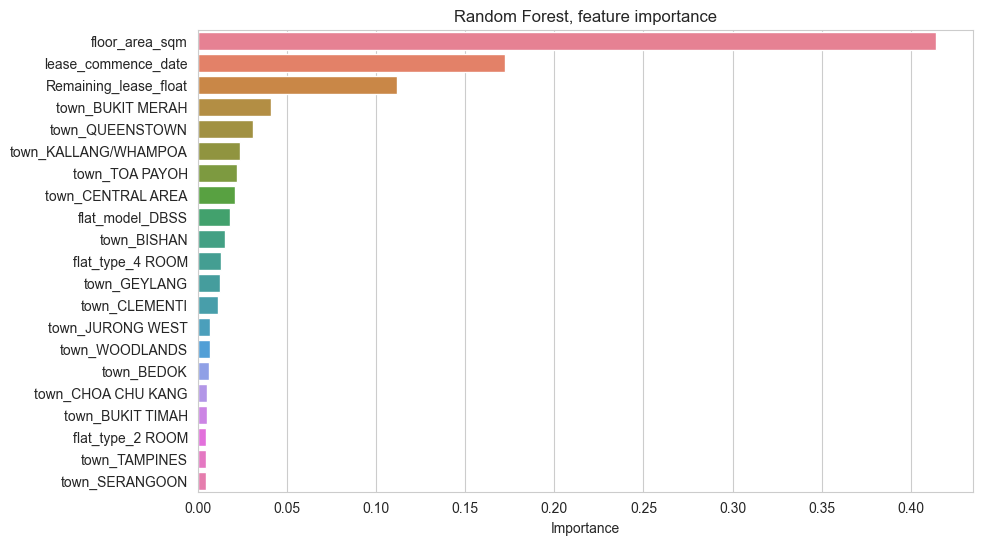

In [312]:
# to visualise in a barplot
plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(data=rf_imp, y=rf_imp.index, x='Importance', palette='husl')
plt.title("Random Forest, feature importance")
plt.ylabel("")
plt.show()